<center><h1>How to create a Transportation Sustainability Report</h1></center>


### Definition of CO2 emissions by Scope
Based on the GHG Protocol corporate standard ([Link](https://ghgprotocol.org/sites/default/files/standards_supporting/FAQ.pdf)), greenhouse gas emissions are 
classified into three scopes:

- Scope 1: direct emissions released into the atmosphere because of the company’s 
    activities (*Company’s facilities like manufacturing plant/warehouses, company’s 
    vehicles*)
---
- Scope 2: indirect emissions from the generation of purchased energy
    (*purchased electricity, gas*, ..)
---
- Scope 3: all indirect emissions (out of scope 2) occurring in the value chain of 
    the company (*Transportation, Waste of Operations, Business Travels*, …)

In this project, we will focus our attention on the Scope 3 calculations related 
to downstream transportation.

### What is the environmental impact of the Transportation network?

#### Formula of CO2 emissions using Emissions Factors
Following the protocol of the French Environmental Agency Ademe (Link), the formula 
to estimate the CO2 emissions of transportation is:
- E_Co2 = W_goods * D * F_mode

---

With,
- **E_CO2**: emissions in kilograms of CO2 equivalent (kgCO2eq)
- **W_goods**: weight of the goods (Ton)
- **D**: distance from your warehouse to the final destination(km)
- **F_mode**: emissions factor for each transportation mode (kgCO2eq/t.km)

This formula provides a gross estimation of the CO2 emissions without requiring 
a high level of granularity of transportation data.

In [2]:
import pandas as pd
import numpy as np

In [3]:
file_path = './Data/order_lines.csv'
df_lines  = pd.read_csv(file_path, index_col=0)
df_lines.head()

,Date,Month-Year,Warehouse Code,Customer Code,Order Number,Order Line Number,Item Code,Units,Euros
112,2021-01-04 00:00:00.000,1-2021,3403434,5002915-15,20247100,1,963543-43,2.0,381.47
14485,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,1,8902753-53,250.0,187.03
14486,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,2,8308591-91,500.0,452.45
14487,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,3,8308621-21,500.0,452.45
14488,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,4,8022921-21,400.0,567.16


In [4]:
# 2.Import Master Data: Unit of Measure Conversions to (kg)
file_path = './Data/uom_conversions.csv'
df_uom = pd.read_csv(file_path, index_col=0)
print("{:,} Unit of Measure Conversions".format(len(df_uom)))
df_uom.head()

557 Unit of Measure Conversions


,Item Code,Conversion Ratio
51,995097-97,0.0242
100,995096-96,0.0242
113,8949591-91,0.0474
131,952547-47,0.0368
276,866370-70,0.0400


In [5]:
# Join
df_join = df_lines.copy()
COLS_JOIN = ['Item Code']
df_join = pd.merge(df_join, df_uom, on=COLS_JOIN, how= 'left', suffixes=('', '_y'))
df_join.head()

,Date,Month-Year,Warehouse Code,Customer Code,Order Number,Order Line Number,Item Code,Units,Euros,Conversion Ratio
0,2021-01-04 00:00:00.000,1-2021,3403434,5002915-15,20247100,1,963543-43,2.0,381.47,56.58400
1,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,1,8902753-53,250.0,187.03,0.03200
2,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,2,8308591-91,500.0,452.45,0.02219
3,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,3,8308621-21,500.0,452.45,0.02219
4,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,4,8022921-21,400.0,567.16,0.03200


In [6]:
# After the merge in case of duplicates columns from the right table, drop them
df_join.drop(df_join.filter(regex='_y$').columns.tolist(), axis=1, inplace = True)
print("{:,} records".format(len(df_join)))
df_join.head()

5,208 records


,Date,Month-Year,Warehouse Code,Customer Code,Order Number,Order Line Number,Item Code,Units,Euros,Conversion Ratio
0,2021-01-04 00:00:00.000,1-2021,3403434,5002915-15,20247100,1,963543-43,2.0,381.47,56.58400
1,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,1,8902753-53,250.0,187.03,0.03200
2,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,2,8308591-91,500.0,452.45,0.02219
3,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,3,8308621-21,500.0,452.45,0.02219
4,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,4,8022921-21,400.0,567.16,0.03200


In [7]:
# 3. Import Distances
file_path = './Data/distances.csv'
df_dist = pd.read_csv(file_path, index_col=0)
df_dist.head()


,Warehouse Code,Warehouse Name,Warehouse Country,Warehouse City,Customer Code,Customer Country,Customer City,Road,Rail,Sea,Air
19,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5002915-15,FRANCE,LES ANGLES,765.728,0.0,0.0,0.0
610,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5397843-43,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0
676,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340669-69,GERMANY,PEINE - WOLTORF,856.000,0.0,0.0,0.0
682,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340672-72,FRANCE,BELLEVILLE,52.694,0.0,0.0,0.0
1375,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5029913-13,FRANCE,MOISSY-CRAMAYEL,288.437,0.0,0.0,0.0


In [8]:
# Location
df_dist['Location'] = df_dist['Customer Country'].astype(str) + ', ' + df_dist['Customer City'].astype(str)
df_dist.head()

,Warehouse Code,Warehouse Name,Warehouse Country,Warehouse City,Customer Code,Customer Country,Customer City,Road,Rail,Sea,Air,Location
19,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5002915-15,FRANCE,LES ANGLES,765.728,0.0,0.0,0.0,"FRANCE, LES ANGLES"
610,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5397843-43,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE"
676,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340669-69,GERMANY,PEINE - WOLTORF,856.000,0.0,0.0,0.0,"GERMANY, PEINE - WOLTORF"
682,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340672-72,FRANCE,BELLEVILLE,52.694,0.0,0.0,0.0,"FRANCE, BELLEVILLE"
1375,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5029913-13,FRANCE,MOISSY-CRAMAYEL,288.437,0.0,0.0,0.0,"FRANCE, MOISSY-CRAMAYEL"


In [9]:
# 4. Import Cities GPS Locations
file_path = './Data/gps_locations.csv'
df_gps = pd.read_csv(file_path, index_col=0)
print("{:,} Locations".format(len(df_gps)))
df_gps.head()


19 Locations


,Location,GPS 1,GPS 2
867,"BULGARIA, DOLNI BOGROV",42.701462,23.490811
1087,"FRANCE, AUBROMETZ",50.303749,2.176058
1153,"FRANCE, BELLEVILLE",48.871184,2.386682
1371,"FRANCE, CLICHY CEDEX",48.904099,2.304123
1534,"FRANCE, GAEL",48.116682,-2.234640


<center><h1>Data Processing</h1></center>


In [10]:
# Merge Distance with GPS Locations
df_dist = pd.merge(df_dist, df_gps, on='Location', how='left', suffixes=('', '_y'))
df_dist.drop(df_dist.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
df_dist.head()

,Warehouse Code,Warehouse Name,Warehouse Country,Warehouse City,Customer Code,Customer Country,Customer City,Road,Rail,Sea,Air,Location,GPS 1,GPS 2
0,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5002915-15,FRANCE,LES ANGLES,765.728,0.0,0.0,0.0,"FRANCE, LES ANGLES",42.579678,2.048950
1,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5397843-43,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369
2,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340669-69,GERMANY,PEINE - WOLTORF,856.000,0.0,0.0,0.0,"GERMANY, PEINE - WOLTORF",52.304594,10.312521
3,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340672-72,FRANCE,BELLEVILLE,52.694,0.0,0.0,0.0,"FRANCE, BELLEVILLE",48.871184,2.386682
4,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5029913-13,FRANCE,MOISSY-CRAMAYEL,288.437,0.0,0.0,0.0,"FRANCE, MOISSY-CRAMAYEL",48.624666,2.595756


In [11]:
# Final Join to build records
COLS_JOIN = ['Warehouse Code', 'Customer Code']
df_join = pd.merge(df_join, df_dist, on = COLS_JOIN, how='left', suffixes=('', '_y'))
# After the merge in case of duplicates columns from the right table, drop them
df_join.drop(df_join.filter(regex='_y$').columns.tolist(), axis=1, inplace = True)
print("{:,} records".format(len(df_join)))
df_join.head()

5,208 records


,Date,Month-Year,Warehouse Code,Customer Code,Order Number,Order Line Number,Item Code,Units,Euros,Conversion Ratio,...,Warehouse City,Customer Country,Customer City,Road,Rail,Sea,Air,Location,GPS 1,GPS 2
0,2021-01-04 00:00:00.000,1-2021,3403434,5002915-15,20247100,1,963543-43,2.0,381.47,56.58400,...,CHALONS-EN-CHAMPAGNE,FRANCE,LES ANGLES,765.728,0.0,0.0,0.0,"FRANCE, LES ANGLES",42.579678,2.048950
1,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,1,8902753-53,250.0,187.03,0.03200,...,CHALONS-EN-CHAMPAGNE,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369
2,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,2,8308591-91,500.0,452.45,0.02219,...,CHALONS-EN-CHAMPAGNE,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369
3,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,3,8308621-21,500.0,452.45,0.02219,...,CHALONS-EN-CHAMPAGNE,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369
4,2021-01-07 00:00:00.000,1-2021,3403434,5397843-43,20258239,4,8022921-21,400.0,567.16,0.03200,...,CHALONS-EN-CHAMPAGNE,FRANCE,SUCY EN BRIE,281.488,0.0,0.0,0.0,"FRANCE, SUCY EN BRIE",48.768810,2.537369


In [13]:
# Calculate Weight (KG)
df_join.info()
df_join['KG'] = df_join['Units'] * df_join['Conversion Ratio']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5208 entries, 0 to 5207
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               5208 non-null   object 
 1   Month-Year         5208 non-null   object 
 2   Warehouse Code     5208 non-null   int64  
 3   Customer Code      5208 non-null   object 
 4   Order Number       5208 non-null   int64  
 5   Order Line Number  5208 non-null   int64  
 6   Item Code          5208 non-null   object 
 7   Units              5208 non-null   float64
 8   Euros              5208 non-null   float64
 9   Conversion Ratio   5207 non-null   float64
 10  Warehouse Name     5208 non-null   object 
 11  Warehouse Country  5208 non-null   object 
 12  Warehouse City     5208 non-null   object 
 13  Customer Country   5208 non-null   object 
 14  Customer City      5208 non-null   object 
 15  Road               5208 non-null   float64
 16  Rail               5208 

In [14]:
# Agg by order
GPBY_ORDER = ['Date', 'Month-Year', 'Warehouse Code', 'Warehouse Name', 
              'Warehouse Country', 'Warehouse City','Customer Code', 
              'Customer Country', 'Customer City','Location', 'GPS 1', 
              'GPS 2', 'Road', 'Rail', 'Sea', 'Air','Order Number'] 

df_agg = pd.DataFrame(df_join.groupby(GPBY_ORDER)[['Units', 'KG']].sum())
df_agg.reset_index(inplace = True)
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               291 non-null    object 
 1   Month-Year         291 non-null    object 
 2   Warehouse Code     291 non-null    int64  
 3   Warehouse Name     291 non-null    object 
 4   Warehouse Country  291 non-null    object 
 5   Warehouse City     291 non-null    object 
 6   Customer Code      291 non-null    object 
 7   Customer Country   291 non-null    object 
 8   Customer City      291 non-null    object 
 9   Location           291 non-null    object 
 10  GPS 1              291 non-null    float64
 11  GPS 2              291 non-null    float64
 12  Road               291 non-null    float64
 13  Rail               291 non-null    float64
 14  Sea                291 non-null    float64
 15  Air                291 non-null    float64
 16  Order Number       291 non

####  We can start to calculate the CO2 emissions using emissions factors associated with the transportation network.

In [16]:
dict_co2e = dict(zip(['Air' ,'Sea', 'Road', 'Rail'], [2.1, 0.01, 0.096, 0.028]))
MODES = ['Road', 'Rail','Sea', 'Air']

#  E_Co2 = W_goods * D * F_mode
    # With,
        # E_CO2: emissions in kilograms of CO2 equivalent (kgCO2eq)
        # W_goods: weight of the goods (Ton)
        # D: distance from your warehouse to the final destination(km)
        # F_mode: emissions factor for each transportation mode (kgCO2eq/t.km)
for mode in MODES:
    df_agg['CO2' + mode] = df_agg['KG'].astype(float) / 1000  * df_agg[mode].astype(float) * dict_co2e[mode]

In [19]:
file_path = './Data/detailed_report.csv'
df_agg['CO2 Total'] = df_agg[['CO2' + mode for mode in MODES]].sum(axis=1)
df_agg.to_csv(file_path)
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               291 non-null    object 
 1   Month-Year         291 non-null    object 
 2   Warehouse Code     291 non-null    int64  
 3   Warehouse Name     291 non-null    object 
 4   Warehouse Country  291 non-null    object 
 5   Warehouse City     291 non-null    object 
 6   Customer Code      291 non-null    object 
 7   Customer Country   291 non-null    object 
 8   Customer City      291 non-null    object 
 9   Location           291 non-null    object 
 10  GPS 1              291 non-null    float64
 11  GPS 2              291 non-null    float64
 12  Road               291 non-null    float64
 13  Rail               291 non-null    float64
 14  Sea                291 non-null    float64
 15  Air                291 non-null    float64
 16  Order Number       291 non

#### Mapping the delivery Mode

In [20]:

df_agg['Delivery Mode'] = df_agg[MODES].astype(float).apply(
    lambda t: [mode if t[mode] > 0 else '-' for mode in MODES],
    axis = 1
)

df_agg.head()

,Date,Month-Year,Warehouse Code,Warehouse Name,Warehouse Country,Warehouse City,Customer Code,Customer Country,Customer City,Location,...,Air,Order Number,Units,KG,CO2Road,CO2Rail,CO2Sea,CO2Air,CO2 Total,Delivery Mode
0,2021-01-04 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5002915-15,FRANCE,LES ANGLES,"FRANCE, LES ANGLES",...,0.0,20247100,2.0,113.16800,8.318967,0.0,0.0,0.0,8.318967,"[Road, -, -, -]"
1,2021-01-07 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340669-69,GERMANY,PEINE - WOLTORF,"GERMANY, PEINE - WOLTORF",...,0.0,20203388,153.0,2530.32471,207.931963,0.0,0.0,0.0,207.931963,"[Road, -, -, -]"
2,2021-01-07 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340672-72,FRANCE,BELLEVILLE,"FRANCE, BELLEVILLE",...,0.0,20203383,128.0,2116.87296,10.708464,0.0,0.0,0.0,10.708464,"[Road, -, -, -]"
3,2021-01-07 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5397843-43,FRANCE,SUCY EN BRIE,"FRANCE, SUCY EN BRIE",...,0.0,20258239,2771.0,71.45232,1.930845,0.0,0.0,0.0,1.930845,"[Road, -, -, -]"
4,2021-01-08 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5003451-51,FRANCE,LEVALLOIS PERRET,"FRANCE, LEVALLOIS PERRET",...,0.0,21000061,2125.0,111.95200,3.172254,0.0,0.0,0.0,3.172254,"[Road, -, -, -]"


In [21]:
dict_map = dict(
    zip(
    df_agg['Delivery Mode'].astype(str).unique(),
    [i.replace(", '-'", '').replace("'-'",'').replace("'",'') for i in df_agg['Delivery Mode'].astype(str).unique()]    
    )
)

df_agg['Delivery Mode'] = df_agg['Delivery Mode'].astype(str).map(dict_map)
df_agg.head(10)

,Date,Month-Year,Warehouse Code,Warehouse Name,Warehouse Country,Warehouse City,Customer Code,Customer Country,Customer City,Location,...,Air,Order Number,Units,KG,CO2Road,CO2Rail,CO2Sea,CO2Air,CO2 Total,Delivery Mode
0,2021-01-04 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5002915-15,FRANCE,LES ANGLES,"FRANCE, LES ANGLES",...,0.0,20247100,2.0,113.16800,8.318967,0.0,0.0,0.0,8.318967,[Road]
1,2021-01-07 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340669-69,GERMANY,PEINE - WOLTORF,"GERMANY, PEINE - WOLTORF",...,0.0,20203388,153.0,2530.32471,207.931963,0.0,0.0,0.0,207.931963,[Road]
2,2021-01-07 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340672-72,FRANCE,BELLEVILLE,"FRANCE, BELLEVILLE",...,0.0,20203383,128.0,2116.87296,10.708464,0.0,0.0,0.0,10.708464,[Road]
3,2021-01-07 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5397843-43,FRANCE,SUCY EN BRIE,"FRANCE, SUCY EN BRIE",...,0.0,20258239,2771.0,71.45232,1.930845,0.0,0.0,0.0,1.930845,[Road]
4,2021-01-08 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5003451-51,FRANCE,LEVALLOIS PERRET,"FRANCE, LEVALLOIS PERRET",...,0.0,21000061,2125.0,111.95200,3.172254,0.0,0.0,0.0,3.172254,[Road]
5,2021-01-08 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5029913-13,FRANCE,MOISSY-CRAMAYEL,"FRANCE, MOISSY-CRAMAYEL",...,0.0,20258208,17466.0,605.06410,16.754196,0.0,0.0,0.0,16.754196,[Road]
6,2021-01-08 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340672-72,FRANCE,BELLEVILLE,"FRANCE, BELLEVILLE",...,0.0,20203327,8460.0,593.08800,3.000209,0.0,0.0,0.0,3.000209,[Road]
7,2021-01-08 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340672-72,FRANCE,BELLEVILLE,"FRANCE, BELLEVILLE",...,0.0,20203395,12162.0,961.23840,4.862544,0.0,0.0,0.0,4.862544,[Road]
8,2021-01-11 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5293132-32,FRANCE,HERLIN LE SEC,"FRANCE, HERLIN LE SEC",...,0.0,21000301,822.0,29.96370,1.017107,0.0,0.0,0.0,1.017107,[Road]
9,2021-01-11 00:00:00.000,1-2021,3403434,WAREHOUSE PARIS AREA 1,FRANCE,CHALONS-EN-CHAMPAGNE,5340669-69,GERMANY,PEINE - WOLTORF,"GERMANY, PEINE - WOLTORF",...,0.0,20203403,10200.0,407.16000,33.458780,0.0,0.0,0.0,33.458780,[Road]


In [25]:
# Aggregate by Delivery mode
GPBY_MODE = ['Delivery Mode']
df_plot = pd.DataFrame(df_agg.groupby(GPBY_MODE)[['CO2 Total']].sum())
df_plot.reset_index(inplace = True)
df_plot.head()

,Delivery Mode,CO2 Total
0,"[Road, Sea]",280.494054
1,[Road],4333.423639


In [23]:
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           257 non-null    object 
 1   Location       257 non-null    object 
 2   Delivery Mode  257 non-null    object 
 3   CO2 Total      257 non-null    float64
dtypes: float64(1), object(3)
memory usage: 8.2+ KB


### Visualization

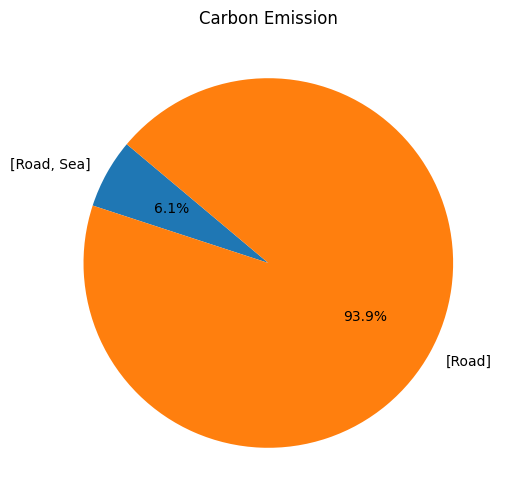

In [26]:
import matplotlib.pyplot as plt
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(df_plot['CO2 Total'], labels=df_plot['Delivery Mode'], autopct='%1.1f%%', startangle=140)
plt.title('Carbon Emission')
plt.show()